This notebook contains exploratory analysis of data.csv, a list of potential UI componenets and data visualizations for the dashboard.

Why I chose this data: 
    I chose this data set because I love the idea of anaylizing a large data set about book! The reviews of the data set are good and people seem to not have problems with it. I found a manipulated version of the origional data set where a Kaggle user scrapped the internet and added genres to the data set. This was the data set I origionally downloaded from Kaggle and later manipulated to form the data.csv file. Overall, the data appears to be trustworthy and accurate. It included genres and titles, which are two things I really want to focus on. I want to be able to possibly look up images based on an isbn number, so I wanted to have that information. I like the idea of being able to look up a list of books based on an author. I like the idea of being able to click on a book and getting a page of information on the book and different comparisons based on its genres. 

Data Provenance:

    ORIGIONAL DATA SET: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
        - This is the origional data set that was created by scraping the Goodreads API under the CC0: Public Domain license. It is updated weekly. 

    MANIPULATED DATA SET by Kaggle user: https://www.kaggle.com/datasets/middlelight/goodreadsbookswithgenres/data
        - User added genres by making a call to 'https://www.googleapis.com/books/v1/volumes?q=isbn:' 
        Books for which a genre could not be found were dropped rather than manually added in
        
    PERSONAL MANIPULATIONS TO DATA SET: data.csv 
        - Removed all rows containing N/A values
        - Renamed column headers to follow personal formatting
        - Seperated Genres column into seperate columns for each genre. This was done with the intention of being able to analyze genres seperately. If a book was placed within the genre, it recieved a 1 and if it was not within the genre it recieved a 0. 
        - Next, genres with the same super genre were grouped together to lessen the total number of genres. 
        - Next, a column mapping genres that I determined were neccessary to the data set's genres was applied to the set and new genres were determined. 
        - Finally, I reordered some of the columns, so that they were in my desired order. 

In [1]:
# import dependencies

from dash import Dash, html, dcc 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#read in the csv file 
goodreads_df = pd.read_csv('data.csv')

Initial Exploration looking at information and statistics:

In [3]:
#Look at the first five rows of data.csv to get an understanding of what the cleaned dataset looks like 
pd.set_option('display.max_columns', None) #want to see all column names 

goodreads_df.head(5)

,title,author,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_date,isbn,adult,art,audiobook,biography,business,childrens,classics,comics,comedy,contemporary,culture,food_and_drink,crime,fantasy,fiction,sexuality_and_gender,literature,graphic_Novels,historical,history,horror,magna,memoir,music,mystery,nonfiction,paranormal,philosophy,poetry,psychology,religion,romance,science,science_fiction,self_help,suspense,spirituality,sports,thriller,travel,young_adult
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,652,4.57,2095690,27591,Scholastic Inc.,9/16/2006,0439785960,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,870,4.49,2153167,29221,Scholastic Inc.,9/1/2004,0439358078,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,352,4.42,6333,244,Scholastic,11/1/2003,0439554896,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,435,4.56,2339585,36325,Scholastic Inc.,5/1/2004,043965548X,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,2690,4.78,41428,164,Scholastic,9/13/2004,0439682584,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
#lets look at the last 5 rows of the dataset
goodreads_df.tail(5)

,title,author,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_date,isbn,adult,art,audiobook,biography,business,childrens,classics,comics,comedy,contemporary,culture,food_and_drink,crime,fantasy,fiction,sexuality_and_gender,literature,graphic_Novels,historical,history,horror,magna,memoir,music,mystery,nonfiction,paranormal,philosophy,poetry,psychology,religion,romance,science,science_fiction,self_help,suspense,spirituality,sports,thriller,travel,young_adult
11025,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,512,4.06,156,20,Da Capo Press,12/21/2004,1560254416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11026,You Bright and Risen Angels,William T. Vollmann,635,4.08,783,56,Penguin Books,12/1/1988,0140110879,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11027,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,415,3.96,820,95,Penguin Books,8/1/1993,0140131965,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11028,Poor People,William T. Vollmann,434,3.72,769,139,Ecco,2/27/2007,0060878827,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11029,Las aventuras de Tom Sawyer,Mark Twain,272,3.91,113,12,Edimat Libros,5/28/2006,8497646983,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
#info gives a quick over view of the entire data set
goodreads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 11030 non-null  object 
 1   author                11030 non-null  object 
 2   num_pages             11030 non-null  int64  
 3   average_rating        11030 non-null  float64
 4   ratings_count         11030 non-null  int64  
 5   text_reviews_count    11030 non-null  int64  
 6   publisher             11030 non-null  object 
 7   publication_date      11030 non-null  object 
 8   isbn                  11030 non-null  object 
 9   adult                 11030 non-null  int64  
 10  art                   11030 non-null  int64  
 11  audiobook             11030 non-null  int64  
 12  biography             11030 non-null  int64  
 13  business              11030 non-null  int64  
 14  childrens             11030 non-null  int64  
 15  classics           

In [6]:
#check the demisions of the dataframe
goodreads_df.shape

(11030, 50)

In [7]:
#number of elements in the dataframe
goodreads_df.size

551500

In [8]:
#demision of dataframe
goodreads_df.ndim

2

In [9]:
#a statistical summary of the column values in the data frame
goodreads_df.describe()
#it could be cool to compare average page lengths for different genres
#could look at the most popular genres

,num_pages,average_rating,ratings_count,text_reviews_count,adult,art,audiobook,biography,business,childrens,classics,comics,comedy,contemporary,culture,food_and_drink,crime,fantasy,fiction,sexuality_and_gender,literature,graphic_Novels,historical,history,horror,magna,memoir,music,mystery,nonfiction,paranormal,philosophy,poetry,psychology,religion,romance,science,science_fiction,self_help,suspense,spirituality,sports,thriller,travel,young_adult
count,11030.000000,11030.000000,1.103000e+04,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000
mean,337.682865,3.937976,1.809403e+04,546.611061,0.114597,0.083953,0.148504,0.108885,0.033092,0.109248,0.302539,0.019855,0.000091,0.123119,0.215594,0.017316,0.006800,0.266908,0.671260,0.044062,0.469719,0.000363,0.202085,0.165549,0.071442,0.022937,0.046510,0.013962,0.162013,0.467452,0.031913,0.126020,0.054397,0.050499,0.071170,0.023028,0.125839,0.114053,0.052947,0.068540,0.034995,0.015141,0.122665,0.068994,0.126473
std,240.922013,0.325159,1.129604e+05,2586.978923,0.318549,0.277330,0.355615,0.311509,0.178884,0.311964,0.459378,0.139508,0.009522,0.328588,0.411252,0.130453,0.082183,0.442364,0.469776,0.205241,0.499105,0.019041,0.401574,0.371692,0.257573,0.149711,0.210595,0.117338,0.368479,0.498962,0.175776,0.331887,0.226810,0.218981,0.257119,0.150000,0.331682,0.317890,0.223937,0.252682,0.183777,0.122117,0.328068,0.253455,0.332397
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,3.770000,1.100000e+02,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,301.000000,3.960000,7.675000e+02,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,416.000000,4.130000,5.071500e+03,242.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6576.000000,5.000000,4.597666e+06,94265.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#the number of missing values in each column:
goodreads_df.isnull().sum()

title                   0
author                  0
num_pages               0
average_rating          0
ratings_count           0
text_reviews_count      0
publisher               0
publication_date        0
isbn                    0
adult                   0
art                     0
audiobook               0
biography               0
business                0
childrens               0
classics                0
comics                  0
comedy                  0
contemporary            0
culture                 0
food_and_drink          0
crime                   0
fantasy                 0
fiction                 0
sexuality_and_gender    0
literature              0
graphic_Novels          0
historical              0
history                 0
horror                  0
magna                   0
memoir                  0
music                   0
mystery                 0
nonfiction              0
paranormal              0
philosophy              0
poetry                  0
psychology  

In [11]:
#the number of unique elements for each object
goodreads_df.nunique()

title                   10257
author                   6573
num_pages                 996
average_rating            206
ratings_count            5294
text_reviews_count       1822
publisher                2255
publication_date         3653
isbn                    11030
adult                       2
art                         2
audiobook                   2
biography                   2
business                    2
childrens                   2
classics                    2
comics                      2
comedy                      2
contemporary                2
culture                     2
food_and_drink              2
crime                       2
fantasy                     2
fiction                     2
sexuality_and_gender        2
literature                  2
graphic_Novels              2
historical                  2
history                     2
horror                      2
magna                       2
memoir                      2
music                       2
mystery   

In [12]:
#columns of the dataframe
goodreads_df.columns

Index(['title', 'author', 'num_pages', 'average_rating', 'ratings_count',
       'text_reviews_count', 'publisher', 'publication_date', 'isbn', 'adult',
       'art', 'audiobook', 'biography', 'business', 'childrens', 'classics',
       'comics', 'comedy', 'contemporary', 'culture', 'food_and_drink',
       'crime', 'fantasy', 'fiction', 'sexuality_and_gender', 'literature',
       'graphic_Novels', 'historical', 'history', 'horror', 'magna', 'memoir',
       'music', 'mystery', 'nonfiction', 'paranormal', 'philosophy', 'poetry',
       'psychology', 'religion', 'romance', 'science', 'science_fiction',
       'self_help', 'suspense', 'spirituality', 'sports', 'thriller', 'travel',
       'young_adult'],
      dtype='object')

In [13]:
#how much memory each column uses
goodreads_df.memory_usage()

Index                     128
title                   88240
author                  88240
num_pages               88240
average_rating          88240
ratings_count           88240
text_reviews_count      88240
publisher               88240
publication_date        88240
isbn                    88240
adult                   88240
art                     88240
audiobook               88240
biography               88240
business                88240
childrens               88240
classics                88240
comics                  88240
comedy                  88240
contemporary            88240
culture                 88240
food_and_drink          88240
crime                   88240
fantasy                 88240
fiction                 88240
sexuality_and_gender    88240
literature              88240
graphic_Novels          88240
historical              88240
history                 88240
horror                  88240
magna                   88240
memoir                  88240
music     

In [14]:
#lets look at the top 10 books with the highest rating
goodreads_df.nlargest(10, 'average_rating')
#because these have so few ratings, there averages might be larger than the actual top books. 
#you have to look at the highest average rating and largest number of books

,title,author,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_date,isbn,adult,art,audiobook,biography,business,childrens,classics,comics,comedy,contemporary,culture,food_and_drink,crime,fantasy,fiction,sexuality_and_gender,literature,graphic_Novels,historical,history,horror,magna,memoir,music,mystery,nonfiction,paranormal,philosophy,poetry,psychology,religion,romance,science,science_fiction,self_help,suspense,spirituality,sports,thriller,travel,young_adult
613,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,364,5.0,0,0,Oxford University Press USA,2/22/1922,0198145047,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
775,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,83,5.0,1,0,Schirmer Mosel,9/1/2006,382960226X,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,32,5.0,4,1,Teaching Resources,1/1/2002,0439271711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1228,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,128,5.0,2,0,Arcadia Publishing,3/17/2003,0738511676,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4087,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,128,5.0,2,0,BradyGames,3/6/2003,0744002354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4748,The Diamond Color Meditation: Color Pathway to...,John Diamond,74,5.0,5,3,Square One Publishers,2/1/2006,1890995525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4982,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,96,5.0,1,0,Boosey & Hawkes Inc,6/1/2004,0851621813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5602,Winchester Shotguns,Dennis Adler/R.L. Wilson,372,5.0,2,0,Chartwell Books,5/15/2008,0785821082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6136,Taxation of Mineral Rents,Ross Garnaut,350,5.0,1,0,Oxford University Press USA,11/17/1983,0198284543,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6198,The New Big Book of America,Todd Davis/Marc Frey,56,5.0,2,1,Courage Books,3/21/2002,0762412631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#lets look at the top 10 books with the highest number of ratings
goodreads_df.nlargest(10, 'ratings_count')

,title,author,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_date,isbn,adult,art,audiobook,biography,business,childrens,classics,comics,comedy,contemporary,culture,food_and_drink,crime,fantasy,fiction,sexuality_and_gender,literature,graphic_Novels,historical,history,horror,magna,memoir,music,mystery,nonfiction,paranormal,philosophy,poetry,psychology,religion,romance,science,science_fiction,self_help,suspense,spirituality,sports,thriller,travel,young_adult
10247,Twilight (Twilight #1),Stephenie Meyer,501,3.59,4597666,94265,Little Brown and Company,9/6/2006,0316015849,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1680,The Hobbit or There and Back Again,J.R.R. Tolkien,366,4.27,2530894,32871,Houghton Mifflin,8/15/2002,0618260307,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1446,The Catcher in the Rye,J.D. Salinger,277,3.80,2457092,43499,Back Bay Books,1/30/2001,0316769177,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
302,Angels & Demons (Robert Langdon #1),Dan Brown,736,3.89,2418736,21303,Pocket Books,4/1/2006,1416524797,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,435,4.56,2339585,36325,Scholastic Inc.,5/1/2004,043965548X,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4375,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,341,4.42,2293963,34692,Arthur A. Levine Books / Scholastic Inc.,6/2/1999,0439064864,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,870,4.49,2153167,29221,Scholastic Inc.,9/1/2004,0439358078,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,398,4.36,2128944,13670,Houghton Mifflin Harcourt,9/5/2003,0618346252,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2093,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,122,3.93,2111750,29677,NAL,5/6/2003,0452284244,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,652,4.57,2095690,27591,Scholastic Inc.,9/16/2006,0439785960,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
#lets look at the top 10 books with the highest number of text reviews
goodreads_df.nlargest(10, 'text_reviews_count')

,title,author,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_date,isbn,adult,art,audiobook,biography,business,childrens,classics,comics,comedy,contemporary,culture,food_and_drink,crime,fantasy,fiction,sexuality_and_gender,literature,graphic_Novels,historical,history,horror,magna,memoir,music,mystery,nonfiction,paranormal,philosophy,poetry,psychology,religion,romance,science,science_fiction,self_help,suspense,spirituality,sports,thriller,travel,young_adult
10247,Twilight (Twilight #1),Stephenie Meyer,501,3.59,4597666,94265,Little Brown and Company,9/6/2006,0316015849,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5229,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,552,4.37,1516367,86881,Alfred A. Knopf,3/14/2006,0375831002,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1054,The Giver (The Giver #1),Lois Lowry,208,4.13,1585589,56604,Ember,1/24/2006,0385732554,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
280,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,197,3.86,1631221,55843,HarperCollins,5/1/1993,0061122416,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
10610,Water for Elephants,Sara Gruen,335,4.09,1260027,52759,Algonquin Books,5/1/2007,1565125606,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7253,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,375,4.25,1766725,47951,Disney Hyperion Books,3/1/2006,0786838655,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5365,Eat Pray Love,Elizabeth Gilbert,368,3.55,1362264,47620,Riverhead Books,2/1/2007,0143038419,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2041,The Glass Castle,Jeannette Walls,288,4.27,808656,46176,Scribner,1/17/2006,074324754X,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1446,The Catcher in the Rye,J.D. Salinger,277,3.80,2457092,43499,Back Bay Books,1/30/2001,0316769177,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,435,4.56,2339585,36325,Scholastic Inc.,5/1/2004,043965548X,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
#lets look at which author has the most amount of books on goodreads
goodreads_df['author'].value_counts()

author
P.G. Wodehouse                                            40
Stephen King                                              40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Donald J. Sobol/Gail Owens                                 1
Donald J. Sobol/Leonard W. Shortall                        1
J.D. Salinger/Eike Schönfeld                               1
J.D. Salinger/Rudolph F. Rau                               1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: count, Length: 6573, dtype: int64

Lets create a quick graphic looking at the number of books for each genre

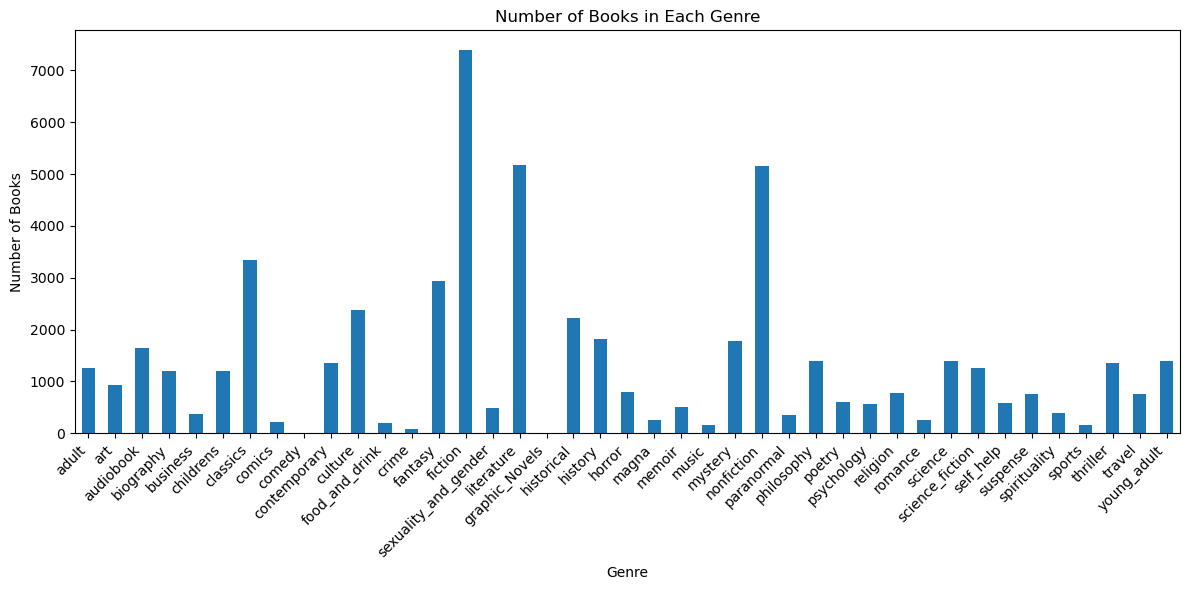

In [18]:
#calculate the sum of values for each genre col
genre_counts = goodreads_df.iloc[:, 9:].sum()

plt.figure(figsize=(12, 6)) #sets fig size
genre_counts.plot(kind='bar')  #i want a bar plot
plt.title('Number of Books in Each Genre') #set the title
plt.xlabel('Genre')#xlabel
plt.ylabel('Number of Books')#ylabel
plt.xticks(rotation=45, ha='right')# this allows for the genres to actually be visible on the bottom access
plt.tight_layout() #take into accont that there is a tight layout
plt.show()#show the graph

Lets create a distribution graph of the average ratings

Observations:
- SO interesting it looks like a normal distribution with a mean of about 4

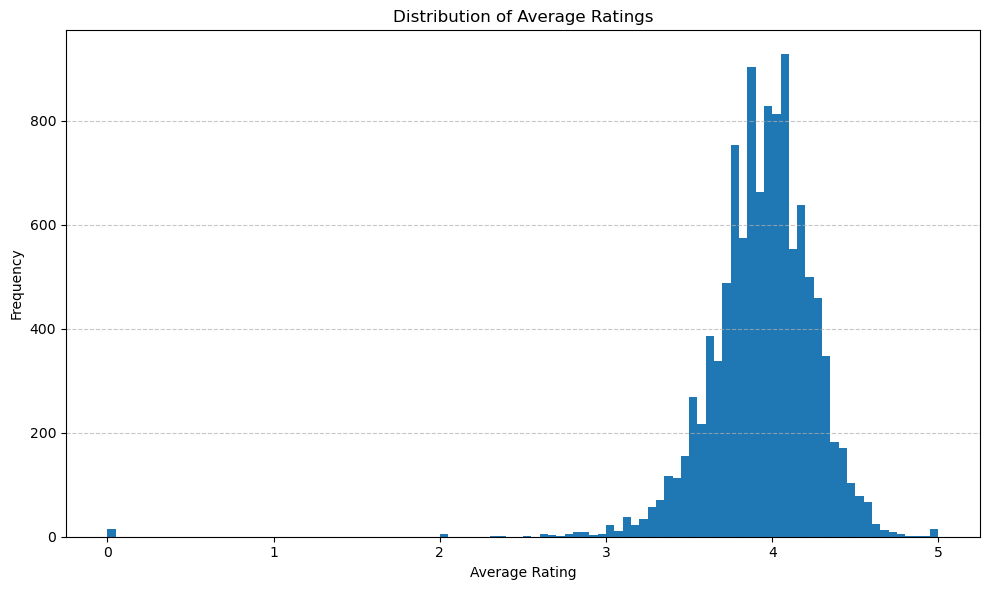

In [19]:

plt.figure(figsize=(10, 6))#set fig size
plt.hist(goodreads_df['average_rating'], bins=100) #i want about 100 bins so that it looks pretty smooth
plt.title('Distribution of Average Ratings')#set the title
plt.xlabel('Average Rating')#set X label
plt.ylabel('Frequency')#set Y label
plt.grid(axis='y', linestyle='--', alpha=0.7) #set the grids 
plt.tight_layout() #as abv, set a tight layout
plt.show()#show the graph

Lets create a distribution graph of the text reviews count

Observations:
- mostly just about 0
- later could possibly go through and remove the first review counts from 0-10 and it might be more interesting

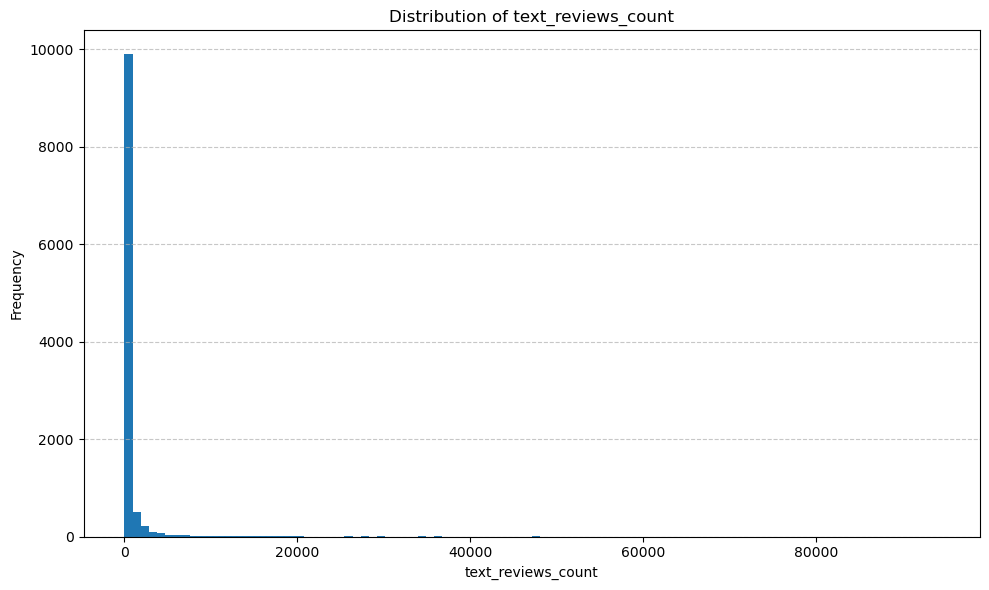

In [20]:

plt.figure(figsize=(10, 6))#set fig size
plt.hist(goodreads_df['text_reviews_count'], bins=100) #i want about 100 bins so that it looks pretty smooth
plt.title('Distribution of text_reviews_count')#set the title
plt.xlabel('text_reviews_count')#set X label
plt.ylabel('Frequency')#set Y label
plt.grid(axis='y', linestyle='--', alpha=0.7) #set the grids 
plt.tight_layout() #as abv, set a tight layout
plt.show()#show the graph

Lets create a distribution graph of the ratings count

Observations:
- mostly just about 0
- later could possibly go through and remove the first review counts from 0-10 and it might be more interesting

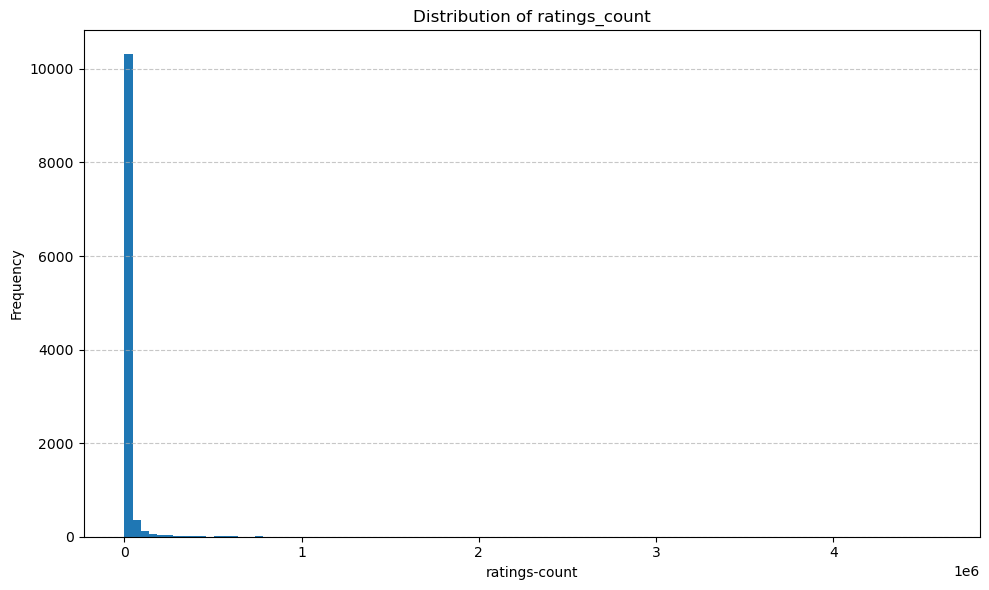

In [21]:
plt.figure(figsize=(10, 6))#set fig size
plt.hist(goodreads_df['ratings_count'], bins=100) #i want about 100 bins so that it looks pretty smooth
plt.title('Distribution of ratings_count')#set the title
plt.xlabel('ratings-count')#set X label
plt.ylabel('Frequency')#set Y label
plt.grid(axis='y', linestyle='--', alpha=0.7) #set the grids 
plt.tight_layout() #as abv, set a tight layout
plt.show()#show the graph

DATA DICTIONARY: 
- The data dictionary holds the Type, Length, Null_Count, Size(Memory), and Definition for all 50 column values. 

In [22]:
#create a dictionary that will eventually be turned into a dataframe 
goodreads_Datadict = {}
#for each of the columns in the goodreads dataframe
for col in goodreads_df.columns:
    #create an entry in the dictionary with the column name as the key
    goodreads_Datadict[col] = {
        #the values should be the type of the value stored in the columns
        'Type':str(goodreads_df.dtypes[col]),
        #the number of values in that col
        'Length': len(goodreads_df[col]),
        #the number of null values in that column value
        'Null_Count': sum(goodreads_df[col].isna()),
        #the amount of memory that columns value takes up
        'Size(Memory)':goodreads_df.memory_usage()[col], 
        #write the definition for each column seperately after
        'Definition': str('')
    }
    #this just makes it so when the dataframe is printed out it shows the full description
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#turn the dictionary into a dataframe
goodreads_df_DD = pd.DataFrame(goodreads_Datadict)
#These are the defintions for each column value 
definitions = {
    'title': 'The title of the book.',
    'author': 'The author or authors of the book.',
    'num_pages': 'The number of pages in the book.',
    'average_rating': 'The average rating of the book.',
    'ratings_count': 'The number of ratings the book has received.',
    'text_reviews_count': 'The number of text reviews the book has received.',
    'publisher': 'The publisher of the book.',
    'publication_date': 'The publication date of the book.',
    'isbn': 'The ISBN (International Standard Book Number) of the book.',
    'adult': 'Indicates whether the book belongs to the adult genre (1 if yes, 0 if no).',
    'art': 'Indicates whether the book belongs to the art genre (1 if yes, 0 if no).',
    'audiobook': 'Indicates whether the book belongs to the audiobook genre (1 if yes, 0 if no).',
    'biography': 'Indicates whether the book belongs to the biography genre (1 if yes, 0 if no).',
    'business': 'Indicates whether the book belongs to the business genre (1 if yes, 0 if no).',
    'childrens': 'Indicates whether the book belongs to the children\'s genre (1 if yes, 0 if no).',
    'classics': 'Indicates whether the book belongs to the classics genre (1 if yes, 0 if no).',
    'comics': 'Indicates whether the book belongs to the comics genre (1 if yes, 0 if no).',
    'comedy': 'Indicates whether the book belongs to the comedy genre (1 if yes, 0 if no).',
    'contemporary': 'Indicates whether the book belongs to the contemporary genre (1 if yes, 0 if no).',
    'culture': 'Indicates whether the book belongs to the culture genre (1 if yes, 0 if no).',
    'food_and_drink': 'Indicates whether the book belongs to the food and drink genre (1 if yes, 0 if no).',
    'crime': 'Indicates whether the book belongs to the crime genre (1 if yes, 0 if no).',
    'fantasy': 'Indicates whether the book belongs to the fantasy genre (1 if yes, 0 if no).',
    'fiction': 'Indicates whether the book belongs to the fiction genre (1 if yes, 0 if no).',
    'sexuality_and_gender': 'Indicates whether the book belongs to the sexuality and gender genre (1 if yes, 0 if no).',
    'literature': 'Indicates whether the book belongs to the literature genre (1 if yes, 0 if no).',
    'graphic_Novels': 'Indicates whether the book belongs to the graphic novels genre (1 if yes, 0 if no).',
    'historical': 'Indicates whether the book belongs to the historical genre (1 if yes, 0 if no).',
    'history': 'Indicates whether the book belongs to the history genre (1 if yes, 0 if no).',
    'horror': 'Indicates whether the book belongs to the horror genre (1 if yes, 0 if no).',
    'magna': 'Indicates whether the book belongs to the magna genre (1 if yes, 0 if no).',
    'memoir': 'Indicates whether the book belongs to the memoir genre (1 if yes, 0 if no).',
    'music': 'Indicates whether the book belongs to the music genre (1 if yes, 0 if no).',
    'mystery': 'Indicates whether the book belongs to the mystery genre (1 if yes, 0 if no).',
    'nonfiction': 'Indicates whether the book belongs to the nonfiction genre (1 if yes, 0 if no).',
    'paranormal': 'Indicates whether the book belongs to the paranormal genre (1 if yes, 0 if no).',
    'philosophy': 'Indicates whether the book belongs to the philosophy genre (1 if yes, 0 if no).',
    'poetry': 'Indicates whether the book belongs to the poetry genre (1 if yes, 0 if no).',
    'psychology': 'Indicates whether the book belongs to the psychology genre (1 if yes, 0 if no).',
    'religion': 'Indicates whether the book belongs to the religion genre (1 if yes, 0 if',
    'romance': 'Indicates whether the book belongs to the romance genre (1 if yes, 0 if no).',
    'science': 'Indicates whether the book belongs to the science genre (1 if yes, 0 if no).',
    'science_fiction': 'Indicates whether the book belongs to the science fiction genre (1 if yes, 0 if no).',
    'self_help': 'Indicates whether the book belongs to the self help genre (1 if yes, 0 if no).',
    'suspense': 'Indicates whether the book belongs to the suspense genre (1 if yes, 0 if no).',
    'spirituality': 'Indicates whether the book belongs to the spirituality genre (1 if yes, 0 if no).',
    'sports': 'Indicates whether the book belongs to the sports genre (1 if yes, 0 if no).',
    'thriller': 'Indicates whether the book belongs to the thriller genre (1 if yes, 0 if no).',
    'travel': 'Indicates whether the book belongs to the travel genre (1 if yes, 0 if no).',
    'young_adult': 'Indicates whether the book belongs to the young adult genre (1 if yes, 0 if no).'
}

#add the definitions to the dataframe
for col in goodreads_df_DD.columns:
    goodreads_df_DD[col]['Definition'] = definitions.get(col, 'Not defined')

goodreads_df_DD.head()

,title,author,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_date,isbn,adult,art,audiobook,biography,business,childrens,classics,comics,comedy,contemporary,culture,food_and_drink,crime,fantasy,fiction,sexuality_and_gender,literature,graphic_Novels,historical,history,horror,magna,memoir,music,mystery,nonfiction,paranormal,philosophy,poetry,psychology,religion,romance,science,science_fiction,self_help,suspense,spirituality,sports,thriller,travel,young_adult
Type,object,object,int64,float64,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Length,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030,11030
Null_Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Size(Memory),88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240,88240
Definition,The title of the book.,The author or authors of the book.,The number of pages in the book.,The average rating of the book.,The number of ratings the book has received.,The number of text reviews the book has received.,The publisher of the book.,The publication date of the book.,The ISBN (International Standard Book Number) of the book.,"Indicates whether the book belongs to the adult genre (1 if yes, 0 if no).","Indicates whether the book belongs to the art genre (1 if yes, 0 if no).","Indicates whether the book belongs to the audiobook genre (1 if yes, 0 if no).","Indicates whether the book belongs to the biography genre (1 if yes, 0 if no).","Indicates whether the book belongs to the business genre (1 if yes, 0 if no).","Indicates whether the book belongs to the children's genre (1 if yes, 0 if no).","Indicates whether the book belongs to the classics genre (1 if yes, 0 if no).","Indicates whether the book belongs to the comics genre (1 if yes, 0 if no).","Indicates whether the book belongs to the comedy genre (1 if yes, 0 if no).","Indicates whether the book belongs to the contemporary genre (1 if yes, 0 if no).","Indicates whether the book belongs to the culture genre (1 if yes, 0 if no).","Indicates whether the book belongs to the food and drink genre (1 if yes, 0 if no).","Indicates whether the book belongs to the crime genre (1 if yes, 0 if no).","Indicates whether the book belongs to the fantasy genre (1 if yes, 0 if no).","Indicates whether the book belongs to the fiction genre (1 if yes, 0 if no).","Indicates whether the book belongs to the sexuality and gender genre (1 if yes, 0 if no).","Indicates whether the book belongs to the literature genre (1 if yes, 0 if no).","Indicates whether the book belongs to the graphic novels genre (1 if yes, 0 if no).","Indicates whether the book belongs to the historical genre (1 if yes, 0 if no).","Indicates whether the book belongs to the history genre (1 if yes, 0 if no).","Indicates whether the book belongs to the horror genre (1 if yes, 0 if no).","Indicates whether the book belongs to the magna genre (1 if yes, 0 if no).","Indicates whether the book belongs to the memoir genre (1 if yes, 0 if no).","Indicates whether the book belongs to the music genre (1 if yes, 0 if no).","Indicates whether the book belongs to the mystery genre (1 if yes, 0 if no).","Indicates whether the book belongs to the nonfiction genre (1 if yes, 0 if no).","Indicates whether the book

Potential UI Components to add to the Dashboard:
- A drop down to select genre types. This could result in a graph plotting average distribution ratings for the selected genres
- A slider to look at the top genres for different average ratings 
- A mulitple choice select button for different types of graphs that could be constructed per genre
- A plot of number of ratings over publication date to see how publication date may affect the number of ratings. There could be a slider to control the span of publication years
- A search bar for book title and then being able to see that books statistics and comparison to average

Potential Data Visualizations (some overlap with what I said above):
- A scatter plot of a books publication year versus its average rating or number of ratings
- A bar graph of genre versus total number of books
- You could select an author and have it generate a bar graph of their books and average ratings
- You could have a user input a couple book titles and select them and have it generate a scatter plot that looks at average rating versus rating count. This would look at popularity of the books